## Best Subset Selection
Predicting a Baseball players Salary based on prior seasons performance

In [1]:
#Import ISLR library
library(ISLR)
fix(Hitters)

Warning message:
"package 'ISLR' was built under R version 3.6.1"

In [2]:
#Columns of data
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [3]:
#Shape of data
dim(Hitters)

[1] 322  20

In [4]:
#To call players with missing salary data
sum(is.na(Hitters$Salary))

[1] 59

In [5]:
#Remove rows with missing values
Hitters=na.omit(Hitters)
dim(Hitters)

[1] 263  20

In [6]:
sum(is.na(Hitters))

[1] 0

In [13]:
#Install leaps package
install.packages("leaps")

Installing package into 'C:/Users/Watson Turbo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Watson Turbo\AppData\Local\Temp\RtmpeiEyOs\downloaded_packages


In [14]:
library(leaps)

Warning message:
"package 'leaps' was built under R version 3.6.1"

In [15]:
#Perform best subset selection given # of predictors using RSS
#Note: regsubsets() only reports up to an 8 variable model
regfit.full=regsubsets(Salary~.,Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

<b>Asterisk indicates variable is included in model<b>

In [16]:
#nvmax to order more variables
regfit.full=regsubsets(Salary~.,data=Hitters,nvmax=19)
reg.summary=summary(regfit.full)

In [17]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [18]:
#To return R^2
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

<b>R^2 with 1 variable = 32%
    
 
R^2 with All variables = 55%<b>

ERROR: Error in plot.xy(xy, type, ...): invalid plot type '1'


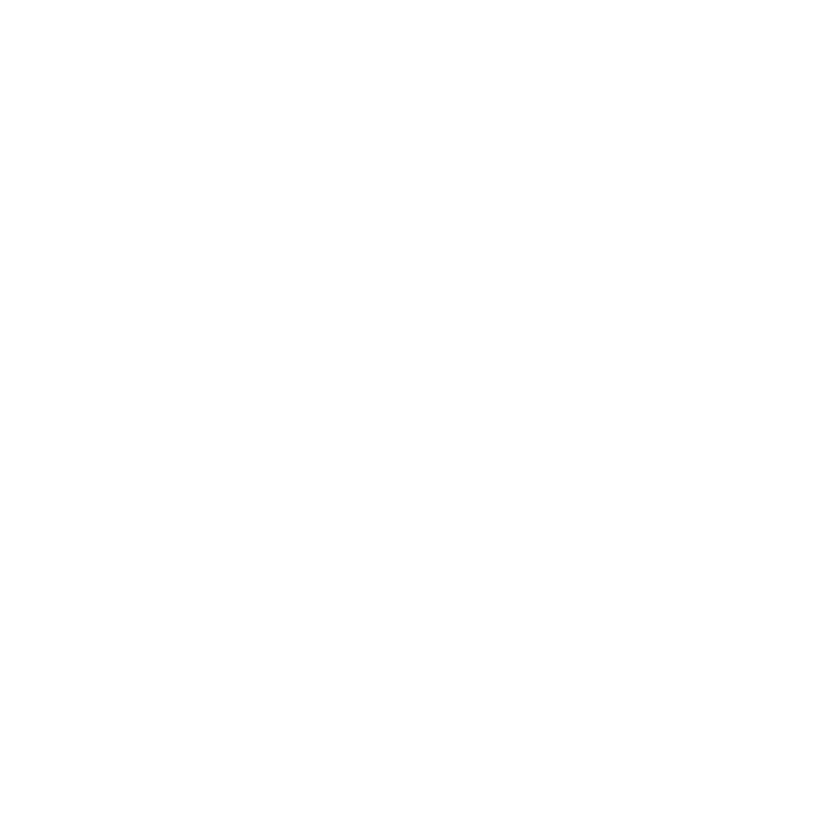

In [33]:
#Plot RSS, adjusted R^2, Cp, and BIC for all models at once
#Type=1 connects the plotted points with lines
par(mfrow=c(2,2))
plot(reg.summary$rss,xlab="Number of Variables",ylab="RSS",type="1")